In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
# Leyendo el df

df = pd.read_excel('/data_practice.xlsx').set_index(["customer_id"])
df.head()

,age,gender,city,signup_date,product_category,price,quantity,payment_method,satisfaction_score
customer_id,,,,,,,,,
1,28,Other,Bogotá,2024-04-16,Electronics,318.58,8,Cash,1
2,32,Male,Cartagena,2023-08-20,Home,282.60,10,Debit Card,3
3,65,Male,Medellín,2023-01-06,Clothing,372.91,5,Credit Card,5
4,46,Other,Bogotá,2023-06-25,Electronics,243.60,4,Credit Card,3
5,30,Male,Bogotá,2023-08-03,Books,281.92,6,Cash,2


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 1 to 300
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 300 non-null    int64  
 1   gender              300 non-null    object 
 2   city                300 non-null    object 
 3   signup_date         300 non-null    object 
 4   product_category    300 non-null    object 
 5   price               300 non-null    float64
 6   quantity            300 non-null    int64  
 7   payment_method      300 non-null    object 
 8   satisfaction_score  300 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 23.4+ KB


In [80]:
df.shape

(300, 9)

In [81]:
df['age'].mean()

np.float64(41.66)

In [82]:
# Precio mayor y menos de los productos

print("Este es el precio maximo =", df['price'].max())
print("Este es el precio minimo =", df['price'].min())

Este es el precio maximo = 499.71
Este es el precio minimo = 12.08


In [83]:
# Ventas por ciudad

df['city'].value_counts()

,count
city,
Barranquilla,63
Bogotá,62
Cali,62
Cartagena,57
Medellín,56


In [84]:
# Promedio de satisfaccion

df['satisfaction_score'].mean()

np.float64(3.026666666666667)

In [85]:
# Lista de compras de clientes mayores de 30 años

df[df['age'] > 30]

,age,gender,city,signup_date,product_category,price,quantity,payment_method,satisfaction_score
customer_id,,,,,,,,,
2,32,Male,Cartagena,2023-08-20,Home,282.60,10,Debit Card,3
3,65,Male,Medellín,2023-01-06,Clothing,372.91,5,Credit Card,5
4,46,Other,Bogotá,2023-06-25,Electronics,243.60,4,Credit Card,3
7,56,Other,Cartagena,2022-11-09,Sports,61.57,6,Cash,3
9,61,Male,Cali,2024-04-20,Home,291.66,8,Debit Card,5
...,...,...,...,...,...,...,...,...,...
292,64,Female,Bogotá,2023-01-07,Electronics,450.44,3,Debit Card,3
295,47,Male,Bogotá,2023-03-29,Sports,481.68,8,Cash,1
297,64,Female,Medellín,2022-12-30,Books,16.90,7,Transfer,3


In [86]:
# Ventas de productos por categorias

df['product_category'].value_counts()

,count
product_category,
Sports,67
Books,60
Clothing,60
Home,57
Electronics,56


In [87]:
# Agregando la colunma de gasto total por compra

df['total_spent'] = df['price'] * df['quantity']
df

,age,gender,city,signup_date,product_category,price,quantity,payment_method,satisfaction_score,total_spent
customer_id,,,,,,,,,,
1,28,Other,Bogotá,2024-04-16,Electronics,318.58,8,Cash,1,2548.64
2,32,Male,Cartagena,2023-08-20,Home,282.60,10,Debit Card,3,2826.00
3,65,Male,Medellín,2023-01-06,Clothing,372.91,5,Credit Card,5,1864.55
4,46,Other,Bogotá,2023-06-25,Electronics,243.60,4,Credit Card,3,974.40
5,30,Male,Bogotá,2023-08-03,Books,281.92,6,Cash,2,1691.52
...,...,...,...,...,...,...,...,...,...,...
296,24,Female,Barranquilla,2024-08-09,Sports,133.97,5,Debit Card,5,669.85
297,64,Female,Medellín,2022-12-30,Books,16.90,7,Transfer,3,118.30
298,31,Female,Medellín,2024-01-10,Home,376.09,6,Cash,5,2256.54


In [88]:
# Mostrando la mayor compra realizada

df['total_spent'].max()

4974.9

In [89]:
# Cantidad total de productos vendidos por ciudad

df_total_products = df.pivot_table(index= "city", values= "quantity", aggfunc= "sum").sort_values(by= "quantity", ascending= False)
df_total_products

,quantity
city,
Cali,403
Barranquilla,391
Medellín,315
Bogotá,312
Cartagena,312


In [90]:
# Cantidad total colectada de las ventas por ciudad

df_total_money = df.pivot_table(index= "city", values= "total_spent", aggfunc= "sum").sort_values(by= "total_spent", ascending= False)
df_total_money

,total_spent
city,
Cali,99367.32
Barranquilla,98033.01
Bogotá,86702.66
Medellín,80032.70
Cartagena,76586.55


In [91]:
# Metodo de pago mas usado

df['payment_method'].value_counts()

,count
payment_method,
Debit Card,82
Transfer,78
Credit Card,71
Cash,69


In [92]:
# Que genero gasta mas en las tiendas

df.groupby("gender")["total_spent"].sum().sort_values(ascending= False)

,total_spent
gender,
Male,168406.65
Female,151424.41
Other,120891.18


In [93]:
# Satisfaccion de los clientes por categoria de productos

df_satisfaction = df.groupby("product_category")["satisfaction_score"].mean().sort_values(ascending= False)
df_satisfaction

,satisfaction_score
product_category,
Home,3.543860
Sports,3.089552
Clothing,2.950000
Electronics,2.821429
Books,2.733333


In [94]:
# Categoria que mas dinero vendio vs su calificacion

df_category = df.pivot_table(index= "product_category", values= "total_spent", aggfunc= "sum").sort_values(by= "total_spent", ascending= False)
df_category.join(df_satisfaction)

,total_spent,satisfaction_score
product_category,,
Sports,98670.30,3.089552
Clothing,93166.71,2.950000
Home,86385.51,3.543860
Books,82977.89,2.733333
Electronics,79521.83,2.821429


In [98]:
# Gasto promedio por cliente en cada categoría.

df_client_cat = df.groupby("product_category")["total_spent"].mean().sort_values(ascending= False)
df_client_cat

,total_spent
product_category,
Clothing,1552.778500
Home,1515.535263
Sports,1472.691045
Electronics,1420.032679
Books,1382.964833


In [99]:
df

,age,gender,city,signup_date,product_category,price,quantity,payment_method,satisfaction_score,total_spent
customer_id,,,,,,,,,,
1,28,Other,Bogotá,2024-04-16,Electronics,318.58,8,Cash,1,2548.64
2,32,Male,Cartagena,2023-08-20,Home,282.60,10,Debit Card,3,2826.00
3,65,Male,Medellín,2023-01-06,Clothing,372.91,5,Credit Card,5,1864.55
4,46,Other,Bogotá,2023-06-25,Electronics,243.60,4,Credit Card,3,974.40
5,30,Male,Bogotá,2023-08-03,Books,281.92,6,Cash,2,1691.52
...,...,...,...,...,...,...,...,...,...,...
296,24,Female,Barranquilla,2024-08-09,Sports,133.97,5,Debit Card,5,669.85
297,64,Female,Medellín,2022-12-30,Books,16.90,7,Transfer,3,118.30
298,31,Female,Medellín,2024-01-10,Home,376.09,6,Cash,5,2256.54


In [105]:
# Cambiando el formato de la fecha a solo año

df_yearly = pd.to_datetime(df['signup_date'])
df_yearly = df['signup_date'].str[:4]
df_yearly

,signup_date
customer_id,
1,2024
2,2023
3,2023
4,2023
5,2023
...,...
296,2024
297,2022
298,2024


In [109]:
# Agregando la columna al df

df["year"] = df_yearly
df

,age,gender,city,signup_date,product_category,price,quantity,payment_method,satisfaction_score,total_spent,year
customer_id,,,,,,,,,,,
1,28,Other,Bogotá,2024-04-16,Electronics,318.58,8,Cash,1,2548.64,2024
2,32,Male,Cartagena,2023-08-20,Home,282.60,10,Debit Card,3,2826.00,2023
3,65,Male,Medellín,2023-01-06,Clothing,372.91,5,Credit Card,5,1864.55,2023
4,46,Other,Bogotá,2023-06-25,Electronics,243.60,4,Credit Card,3,974.40,2023
5,30,Male,Bogotá,2023-08-03,Books,281.92,6,Cash,2,1691.52,2023
...,...,...,...,...,...,...,...,...,...,...,...
296,24,Female,Barranquilla,2024-08-09,Sports,133.97,5,Debit Card,5,669.85,2024
297,64,Female,Medellín,2022-12-30,Books,16.90,7,Transfer,3,118.30,2022
298,31,Female,Medellín,2024-01-10,Home,376.09,6,Cash,5,2256.54,2024


In [113]:
df_category_year = df.pivot_table(index= "year", values= "total_spent", columns= "product_category", aggfunc= "sum").sort_values(by= "year", ascending= False)

df_category_year

product_category,Books,Clothing,Electronics,Home,Sports
year,,,,,
2024,16100.36,26229.43,23822.13,20968.83,25458.48
2023,34158.54,29473.81,29758.25,41700.60,37697.69
2022,32718.99,37463.47,25941.45,23716.08,35514.13


<Axes: xlabel='year'>

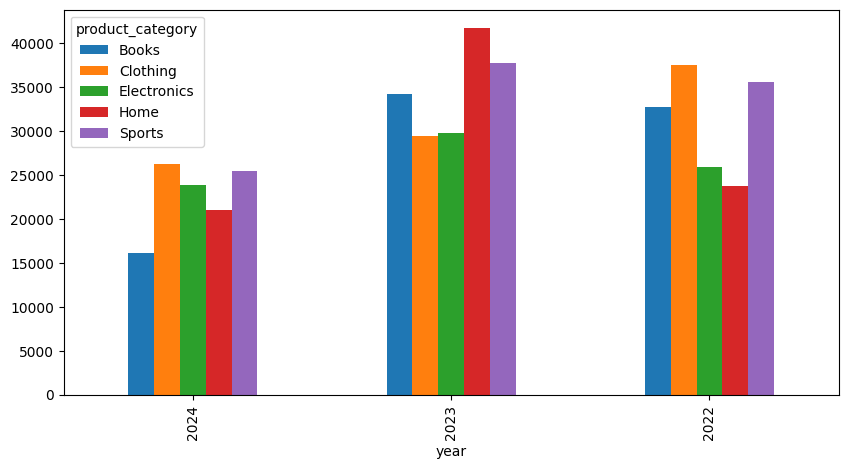

In [118]:
# Creando grafico relacion años y categorias

df_category_year.plot(kind= "bar", figsize= (10, 5))